In [2]:
!pip install regex nltk numpy pandas matplotlib tensorflow keras wordcloud seaborn

  Using cached regex-2024.11.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (781 kB)
  Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.0 MB/s eta 0:00:0000:0100:01
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached tensorflow-2.19.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.7 MB/s eta 0:00:00
  Using cached wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached click-8.1.8-py3-none-any.whl (98 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using 

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

from wordcloud import WordCloud
from tensorflow.keras import layers, models, losses, Sequential, optimizers, metrics

2025-04-21 04:34:22.594934: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 04:34:22.596050: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-21 04:34:22.599486: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-21 04:34:22.608692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745210062.624919  788669 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745210062.62

In [ ]:
data = pd.read_csv("/home/prism/toxicity_guardrail/train.csv")
data.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
11812,1f3900dae4bd1d79,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
128321,ae52f7fd94c28134,"My Page\n\nI don´t know if you´re an Admin, bu...",0,0,0,0,0,0
109970,4c4012c99fa5a494,It would seem that you're just guessing about ...,0,0,0,0,0,0
27674,49428248cbbc3f42,"My suggested edit is simple, take out the word...",0,0,0,0,0,0
33163,58497771408308cf,uhh \n\nthe page has been here since 2012 and ...,0,0,0,0,0,0
47969,8027f1ab86a5ccae,She wrote this herself \nHow would a source kn...,0,0,0,0,0,0
127376,a93e758204c12eee,"""\n While I haven't found the diff I'd hoped, ...",0,0,0,0,0,0
53879,8fee35631075dc7a,"""\nAndrew, I only meant to elucidate my agreem...",0,0,0,0,0,0
130476,ba02f1b97ddc0276,"""\nByelf2007, I agree with the IP above. These...",0,0,0,0,0,0
146451,2c6e8f2c16d37d75,YOU ARE REALLY ANNOYING!!!! gO SCREW YOUR LESB...,1,0,1,0,1,1


In [3]:
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data['toxicity_label'] = data[toxicity_columns].any(axis=1).astype(int)

In [4]:
data.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity_label
80411,d7206d7693d76a21,""" January 2008 (UTC)\n\nSo glad that you liked...",0,0,0,0,0,0,0
100215,188732719a095f34,", 28 October 2008 (UTC)\n Since posting the ab...",0,0,0,0,0,0,0
41007,6d698fe2b42ae401,"Newton was proven wrong by Einstein , newton w...",0,0,0,0,0,0,0
93749,fab525504d608ccc,"""\n\n (sigh) First, sign your posts. Second, b...",0,0,0,0,0,0,0
99503,144a2307b26920ba,"Ways to improve Kırmızı elbiseler \n\nHi, I'm ...",0,0,0,0,0,0,0
70715,bd3d7b2fd1571280,"""\n\nDraft\nAn earlier draft was declined, hen...",0,0,0,0,0,0,0
122534,8f77318c59caeebd,"""\n\nDuly noted. I am attempting to do the sa...",0,0,0,0,0,0,0
7089,12e78d21d297467e,I would like to see a source for Cecil C. Hump...,0,0,0,0,0,0,0
159299,fbb57e7feb4c31ed,"I get your reasoning, but my friend Annie Muns...",0,0,0,0,0,0,0
59452,9f40366c3fdf6946,Yep..I agree..what about meaningful characters...,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              159571 non-null  object
 1   comment_text    159571 non-null  object
 2   toxic           159571 non-null  int64 
 3   severe_toxic    159571 non-null  int64 
 4   obscene         159571 non-null  int64 
 5   threat          159571 non-null  int64 
 6   insult          159571 non-null  int64 
 7   identity_hate   159571 non-null  int64 
 8   toxicity_label  159571 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 11.0+ MB


In [6]:
data.isnull().sum()

id                0
comment_text      0
toxic             0
severe_toxic      0
obscene           0
threat            0
insult            0
identity_hate     0
toxicity_label    0
dtype: int64

In [7]:
data['toxicity_label'].value_counts()

toxicity_label
0    143346
1     16225
Name: count, dtype: int64

<Axes: xlabel='toxicity_label', ylabel='count'>

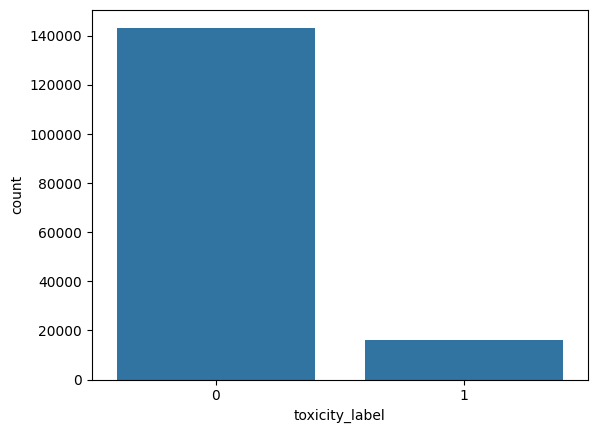

In [ ]:
import seaborn as sns
sns.countplot(data = data, x = "toxicity_label")

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words("english")
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /home/prism/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string

def custom_standardization(input_data):

    # Convert to lowercase
    lowercase = tf.strings.lower(input_data)

    # Matches alphanumeric characters with digits and remove those
    stripped_digits = tf.strings.regex_replace(lowercase, "\w*\d\w*", "")

    # Remove stopwords
    stripped_stopwords = tf.strings.regex_replace(stripped_digits, r"\b(?:{})\b".format("|".join(stop_words)), "")

    # Replace multiple whitespaces with a single whitespace
    return tf.strings.regex_replace(stripped_stopwords, "\s+", " ")

In [11]:
data["comment_text"][20]

'"\n\n Regarding your recent edits \n\nOnce again, please read WP:FILMPLOT before editing any more film articles.  Your edits are simply not good, with entirely too many unnecessary details and very bad writing.  Please stop before you do further damage. -\'\'\'\'\'\'The \'45 "'

In [12]:
custom_standardization(data["comment_text"][20]).numpy()

E0000 00:00:1745210066.046527  788669 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745210066.053193  788669 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


b'" regarding recent edits , please read wp:filmplot editing film articles. edits simply good, entirely many unnecessary details bad writing. please stop damage. -\'\'\'\'\'\' \' "'

In [ ]:
data["comment_text"] = data["comment_text"].apply(custom_standardization)
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity_label
0,0000997932d777bf,"tf.Tensor(b""explanation edits made username ha...",0,0,0,0,0,0,0
1,000103f0d9cfb60f,"tf.Tensor(b""'aww! matches background colour ' ...",0,0,0,0,0,0,0
2,000113f07ec002fd,"tf.Tensor(b""hey man, ' really trying edit war....",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"tf.Tensor(b'"" \' make real suggestions improve...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"tf.Tensor(b"", sir, hero. chance remember page ...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,"tf.Tensor(b'""::::: second time asking, view co...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,tf.Tensor(b' ashamed horrible thing put talk p...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"tf.Tensor(b'spitzer umm, theres actual article...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,tf.Tensor(b' looks like actually put speedy fi...,0,0,0,0,0,0,0


In [14]:
# Define a function to convert tensor to string
def tensor_to_string(tensor):
    return tensor.numpy().decode("utf-8")  # Assuming utf-8 encoding

# Apply the function to the DataFrame column
data["comment_text"] = data["comment_text"].apply(tensor_to_string)

data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity_label
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,'aww! matches background colour ' seemingly st...,0,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, ' really trying edit war. ' guy const...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,""" ' make real suggestions improvement - wonder...",0,0,0,0,0,0,0
4,0001d958c54c6e35,", sir, hero. chance remember page ' ?",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,"""::::: second time asking, view completely con...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page. ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"spitzer umm, theres actual article prostitutio...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,looks like actually put speedy first version ...,0,0,0,0,0,0,0


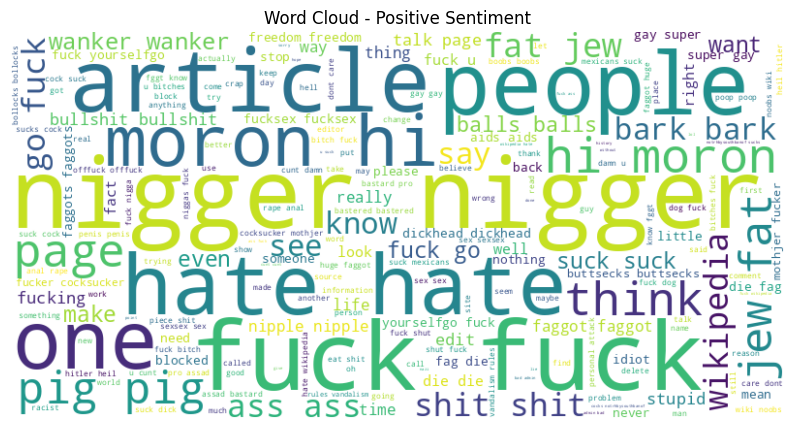

In [15]:
# Extract the text from positive sentiment tweets
toxic= data[data["toxicity_label"] == 1]["comment_text"]

# Concatenate all the positive sentiment tweets into a single string
positive_text = " ".join(toxic)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(positive_text)

# Plot the WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Sentiment")
plt.show()

In [ ]:
data.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity_label
123650,95577efd89836812,""""""" attack"""" user page attack protected vandal...",0,0,0,0,0,0,0
70838,bd93cae5b27ee6f7,"""::::::: use reputable sources, """"sources veri...",0,0,0,0,0,0,0
37976,6563eabb38d5abc3,"yes, except important characters recurring, re...",0,0,0,0,0,0,0
153326,9b3594a2278b365a,""" extended format include questions clarificat...",0,0,0,0,0,0,0
93913,fb20f5dd1906a0a3,"spot lighten , article improving desired struc...",0,0,0,0,0,0,0
96907,0662685b1952cbfc,resource answer questions: http://racialreali...,0,0,0,0,0,0,0
78829,d2eeeb024356f6e0,read edit history article question. merbabu v...,0,0,0,0,0,0,0
32983,57c84a127c2f0b9c,think one added article unless serious object...,0,0,0,0,0,0,0
80639,d7bb7dfed888f745,would counter top right every homepage count r...,0,0,0,0,0,0,0
54108,909124ee02385b30,support option actually another abby martin ar...,0,0,0,0,0,0,0


In [ ]:
data=data.drop(columns='toxic',axis=1)
data=data.drop(columns='severe_toxic',axis=1)
data=data.drop(columns='obscene',axis=1)
data=data.drop(columns='threat',axis=1)
data=data.drop(columns='insult',axis=1)
data=data.drop(columns='identity_hate',axis=1)

In [21]:
data.sample(10)

,id,comment_text,toxicity_label
28715,4c11881e5e9f74ee,"' mind chomksy, ' better fickyystein.",0
156009,c77a3120265c10de,fuxoft - surprised busy admins caught name ye...,0
126419,a42a6bc830164176,sex space sweet. thanks education! ),1
131042,bd27074f4807fe64,""", april (utc) still article, removing without...",0
79274,d42d75c4b0f7aee0,"actually, winner dallas vs seattle game ' auto...",0
107919,40d6f8e34ab057df,""" rotten tomatoes article says highest rated m...",0
140914,f213c13e2a9878ee,also registered old account sent email aswell.,0
73220,c3e08bb4f6b79d2d,. things happened documented,0
97306,08a116f2cc788eb3,"young? indeed. full ? oh much , much fact. hat...",0
101978,21bf33d1e70d610f,"clarification, called, ask anyone name. asked...",0


In [23]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Using cached scipy-1.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size = 0.2, stratify = data["toxicity_label"], random_state = 123)
X_train, X_val = train_test_split(X_train, test_size = 0.1, stratify = X_train["toxicity_label"], random_state = 123)

X_train.shape, X_val.shape, X_test.shape

((114890, 3), (12766, 3), (31915, 3))

In [23]:
X_train['toxicity_label'].value_counts()

toxicity_label
0    103208
1     11682
Name: count, dtype: int64

In [24]:
X_test['toxicity_label'].value_counts()

toxicity_label
0    28670
1     3245
Name: count, dtype: int64

In [25]:
X_val['toxicity_label'].value_counts()

toxicity_label
0    11468
1     1298
Name: count, dtype: int64

In [26]:
raw_train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train["comment_text"].values, X_train["toxicity_label"].values)).shuffle(1024).batch(batch_size = 128)

raw_val_ds = tf.data.Dataset.from_tensor_slices(
    (X_val["comment_text"].values, X_val["toxicity_label"].values)).batch(batch_size = 128)

raw_test_ds = tf.data.Dataset.from_tensor_slices(
    (X_test["comment_text"].values, X_test["toxicity_label"].values)).batch(batch_size = 128)

len(raw_train_ds), len(raw_val_ds), len(raw_test_ds)

(898, 100, 250)

In [ ]:
counts = np.bincount(X_train["toxicity_label"])
class_weight = {
    0: 1/(counts[0]/sum(counts))**0.3,  
    1: 1/(counts[1]/sum(counts))**0.3   
}

In [ ]:
from tensorflow.keras.layers import TextVectorization


max_tokens = 20000  
sequence_length = 200  

vectorize_layer = TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=sequence_length,
)

vectorize_layer.adapt(X_train["comment_text"].values)

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    vectorize_layer,
    layers.Embedding(max_tokens, 128, mask_zero=True),
    layers.SpatialDropout1D(0.3),
    layers.Bidirectional(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9
)

In [131]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr_schedule),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    patience=5,
    mode='max',
    restore_best_weights=True
)

In [ ]:

history = model.fit(
    raw_train_ds,
    validation_data=raw_val_ds,
    epochs=10,
    class_weight=class_weight,
    callbacks=[early_stopping]
)

Epoch 1/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 140s 151ms/step - accuracy: 0.8684 - auc: 0.6485 - loss: 0.9653 - precision: 0.3435 - recall: 0.1377 - val_accuracy: 0.9377 - val_auc: 0.9273 - val_loss: 0.3522 - val_precision: 0.7362 - val_recall: 0.6040
Epoch 2/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.9419 - auc: 0.9280 - loss: 0.3947 - precision: 0.7240 - recall: 0.6973 - val_accuracy: 0.9525 - val_auc: 0.9547 - val_loss: 0.1934 - val_precision: 0.7830 - val_recall: 0.7365
Epoch 3/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.9564 - auc: 0.9584 - loss: 0.2424 - precision: 0.7780 - recall: 0.8006 - val_accuracy: 0.9553 - val_auc: 0.9617 - val_loss: 0.1545 - val_precision: 0.7887 - val_recall: 0.7650
Epoch 4/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.9627 - auc: 0.9709 - loss: 0.1915 - precision: 0.8074 - recall: 0.8319 - val_accuracy: 0.9572 - val_auc: 0.9636 - val_loss: 0.1418 - val_precision: 0.8006 - val_recall: 0.7704
Epoch 5/7
898/898 ━━

In [135]:
test_results = model.evaluate(raw_test_ds)
print(f"Test Accuracy: {test_results[1]:.2f}")
print(f"Test AUC: {test_results[4]:.2f}")

 22/250 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9521 - auc: 0.9470 - loss: 0.1500 - precision: 0.7715 - recall: 0.7480

250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9559 - auc: 0.9619 - loss: 0.1367 - precision: 0.7750 - recall: 0.7786
Test Accuracy: 0.96
Test AUC: 0.96


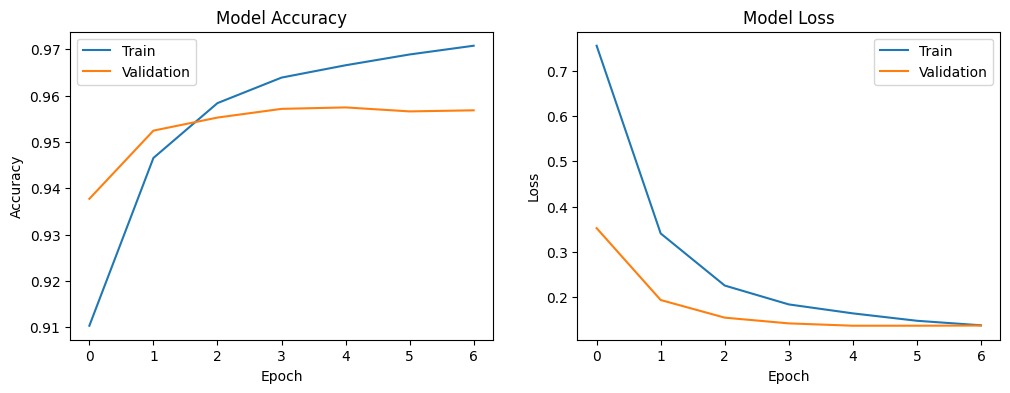

In [136]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.show()

plot_history(history)

In [ ]:
model.save("toxic.keras")

In [68]:
loaded_model = tf.keras.models.load_model("toxic.keras")


/home/prism/toxicity_guardrail/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 23 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
text  = tf.constant(["****"])    
prob  = loaded_model.predict(text)[0, 0]

print(f"Toxicity probability: {prob:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Toxicity probability: 0.420
